### Higher Dimensional Data

In this section we will learn about exploring high-dimensional data.  We will look at two approaches: PCA and t-SNE. Both approaches can map data with thousands of dimensions to a 2-dimension which can be explored visually. It is also used as a compression techniques. This help in discovering patterns in the data which may not have been possible in higher-dimensions. For example, for a data set we might see clustering in 2-dimensions helping in classifications.

Topics to be covered:

### References 

(https://7264-843222-gh.circle-artifacts.com/0/home/ubuntu/scikit-learn/doc/_build/html/stable/auto_examples/preprocessing/plot_scaling_importance.html)

http://scikit-learn.org/stable/modules/decomposition.html#exact-pca-and-probabilistic-interpretation

https://plot.ly/ipython-notebooks/principal-component-analysis/

https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm

http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

https://distill.pub/2016/misread-tsne/

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets
import matplotlib.pyplot 
%matplotlib inline

In [4]:
iris = sns.load_dataset("iris")
iris[iris.species=='setosa'][0:6]#gives rows from 0 to 5 #features of the data #characterstics of observations

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [7]:
#4 characters means 4 dimentional data 

In [7]:
iris[iris.species=='virginica'][0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


Let us assume we locate an IRIS flower and can measure all the features: sepal_length,sepal_width,petal_length, and petal_width. By observing these features can we say about its species? For this we would like to do a 4-d scatter plot and color each dot corresponding to the species, and see if dots are getting clustered based on their species. If so, we may be able to say about the species of the new flower.  The problem here is to do a 4-D scatter plot!

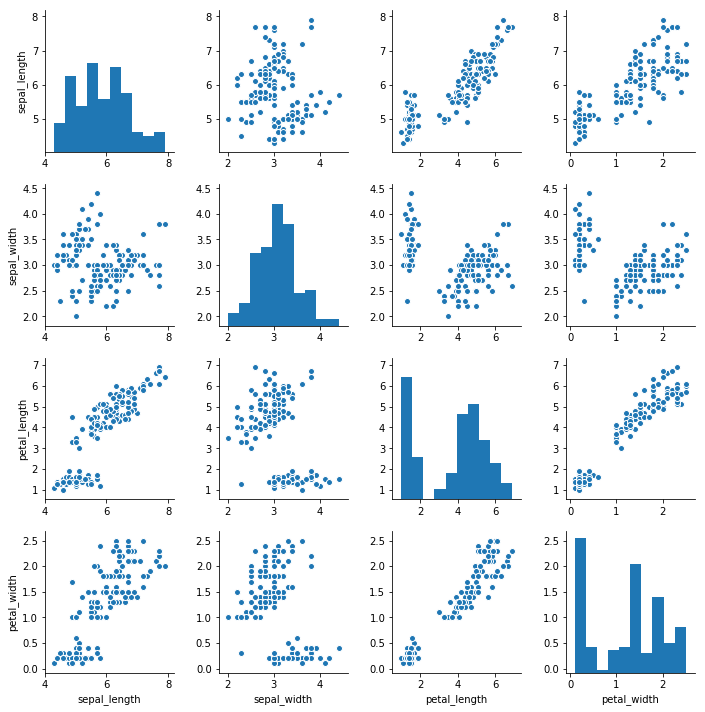

In [8]:
sns.pairplot(iris)

Let us see if we pick two features and see if we can make a distinction? Which two features?

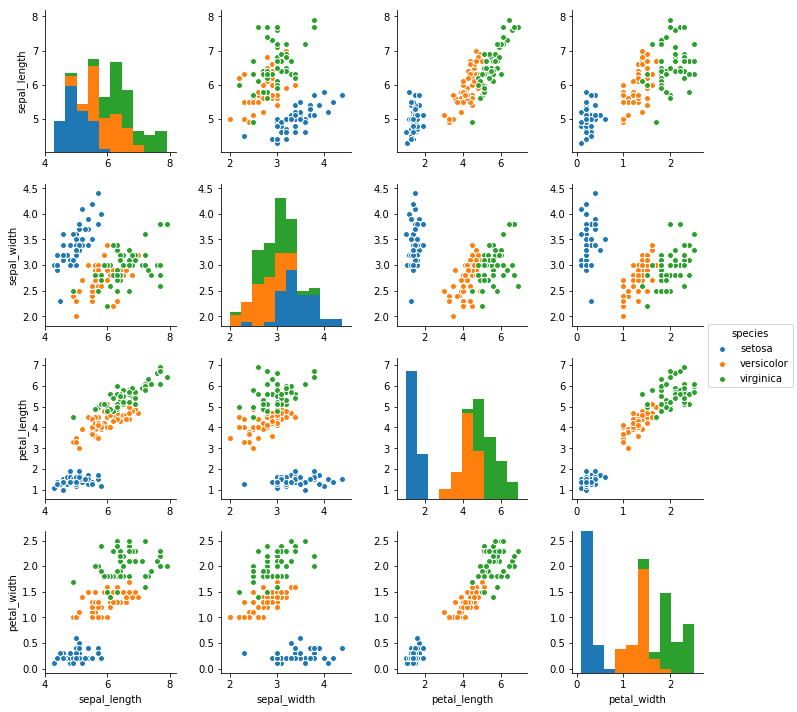

In [9]:
g = sns.pairplot(iris, hue="species")

It looks if we select petal_length and sepal_length, we are able to form almost separable clusters. This may work for this and some other dataset of low-dimension. 

In general, for very high-dimensional data it is not possible to do multiple scatter plots and it is difficult to visually identify coorelated features (variables)  and reduce them. 

For example, in the above figure we see there is an almost a linear relatrionship between petal_length and petal_width, so it is possible to reduce these two variables  to a single variable. 

Principal Compoinent Analysis essentially transforms a number of correlated variables to a reduced number of uncorrelated variables (also referred as principal components). 

The principal components (new reduced set of variables) are ordered based on their significance. The first component captures the maximum amount of variability in the data, followed by the second one, and so on. 

In summary, PCA reduces a large set of features (variables) in the data to a reduced set of features (variables) that still contains most of the information. 

NOTE: In our discussion below we use toy problems and small data set simply to illustrated the working of PCA and other higher-dimensional reduction approaches. Mostly these approaches are applied for large higher-dimensional data sets. 

<h3> Toy Example to Illustrate PCA </h3>

In this toy example, we consider the following three points in 2D and see how they can be reduced to 1D points.

(1, 2), (2, 4), (3, 6)

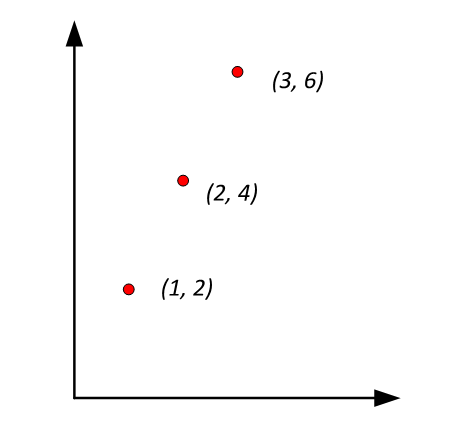





Now redraw the two axis such that one axis is going over the points

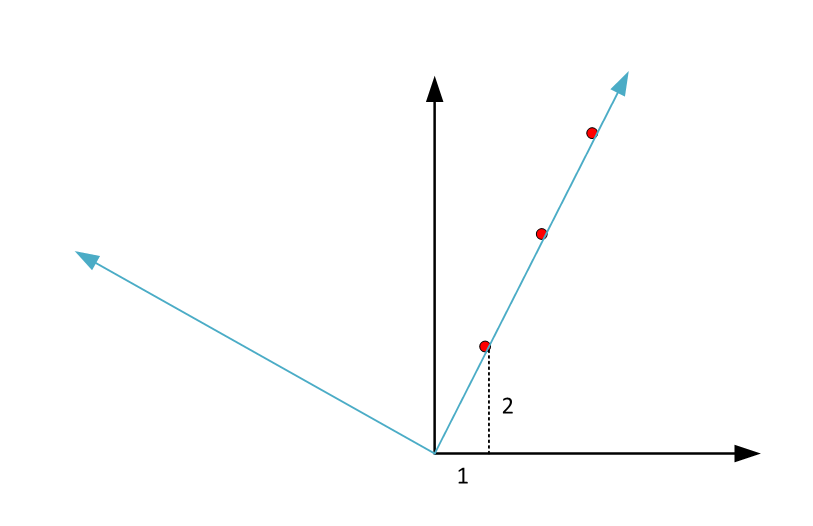

The three points in the new axis are 1D points. The value for the other dimension for all the three points is zero

Question: When we moved the axis why all the three points landed on the axis?

The three points can be represented as: (a,0), (b,0), (c,0)
Here, $a = \sqrt{1^2+2^2}$, $b = \sqrt{2^2+4^2}$, and $c = \sqrt{3^2+6^2}$

Note that all the information about the three points is in the first dimension, so we can drop the second dimension. In this process, we have also achieved compression.

Real data is not so nice

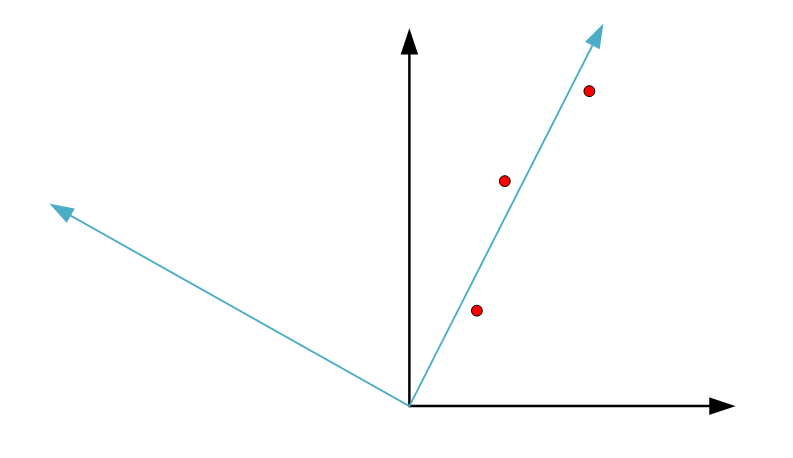


The three points can be represented as:

$(a,-\delta_1), (b,\delta_2), (c,-\delta_3)$

In this case most of the information is still in the first dimension so we can decide to drop the second dimension and achieve the dimensional reduction with some loss. 

Observe that variance along the first dimension is large compared to small variance along the second dimension. <b>A relatively large variance along a dimension is an indication of having more information about the points.</b>

Also, observe the error in approximating the data by one dimension is also small (one way to compute this error is perpendicular distance of red dots from the rotated X axis; and another way is to first reduce the dimension that is project the red dots on the rotated X axis and then rotate the axis back to its original state and compute the error).

### Using Eigen Decomposition 

Let $\mathbf X$ be the data matrix of size $n \times d$, where $n$ is the number of data points and $d$ is the number of dimensions. The Eigen Decomposition of the matrix $\mathbf X^\top \mathbf X$ is given by:


$$\mathbf X^\top \mathbf X = \mathbf W \mathbf L \mathbf W^\top$$,

where $\mathbf W$ is a $d \times d$ matrix of eigenvectors and $\mathbf L$ is a diagonal matrix with eigenvalues.The$j$-th principal component is given by $j$-th column of $\mathbf X \mathbf W$. 

In [10]:
# Dimensional reduction without loss
import numpy as np
x = np.array([[1.0, 2.0], [2.0, 4.0], [3.0, 6.0]])
x

array([[ 1.,  2.],
       [ 2.,  4.],
       [ 3.,  6.]])

In [11]:
cov_mat = x.T.dot (x) # this is like covariance matrix with some scaling
print (cov_mat)
np.shape(x)

[[ 14.  28.]
 [ 28.  56.]]


(3, 2)

In [16]:
np.cov?

In [34]:
x.T.dot?

In [12]:
cov_matN = np.cov(x.T)
print(cov_matN)

[[ 1.  2.]
 [ 2.  4.]]


In [13]:
mean = np.mean(x, axis=0)
print("mean",mean)
xn = x - mean
print("value of xm",xn)

mean [ 2.  4.]
value of xm [[-1. -2.]
 [ 0.  0.]
 [ 1.  2.]]


$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

$cov_{x,x}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(x_{i}-\bar{x})}{N-1}$

$cov_{y,y}=\frac{\sum_{i=1}^{N}(y_{i}-\bar{y})(y_{i}-\bar{y})}{N-1}$

In [14]:
#N = 3 -> N-1 = 2
print (xn.T.dot(xn)/2)  # after centering the data, x^T x  is same as covariance matrix

[[ 1.  2.]
 [ 2.  4.]]


In [15]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('cov matrix \n',cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\n Eigenvalues \n%s' %eig_vals)

cov matrix 
 [[ 14.  28.]
 [ 28.  56.]]
Eigenvectors 
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]

 Eigenvalues 
[  0.  70.]


In [16]:
E1 = eig_vecs[:,1] # use the eigenvector corresponding to eigen value 70
print (E1)
print (x)
xr = np.dot(x, -E1) 
# minus sign before E1 does not impact the overall conclusion, just makes 
# it easy to match it with the geometric interpreation
print (xr)
# Note that from the figure we know the distance of three points from the origin is:
print (np.sqrt(1+4), np.sqrt(4+16), np.sqrt(9+36)) # this is also the representation of data in one dimension


[-0.4472136  -0.89442719]
[[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]]
[ 2.23606798  4.47213595  6.70820393]
2.2360679775 4.472135955 6.7082039325


### Using SVD and its Relationship with Eigen Decomposition 

We can perform the singular value decomposition (SVD) of $\mathbf X$:

$$\mathbf{X^\top} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top$$

Here $\mathbf U$ is a $d \times d$ orthogonal matrix and its columns are the left singular vectors. $\mathbf{\Sigma}$ is a $d \times n$ diagonal matrix of singular values. The matrix $\mathbf V^\top$ is of size $n \times n$ and its rows are the right singular vectors.

How is SVD related to Eigen Decomposition?

$$\mathbf{X^\top} \mathbf X = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top \mathbf{V} \mathbf{\Sigma} \mathbf{U}^\top  $$

$$\mathbf{X^\top} \mathbf X = \mathbf{U} \mathbf{\Sigma^2} \mathbf{U}^\top  $$

Here $\mathbf U$ just like  $\mathbf W$ in the Eigen Decomposition is a $d \times d$ matrix of eigenvectors. 

For dimensional reduction, basically multiply the data matrix $\mathbf x$ by  the subset of column vectors of $\mathbf U = \{ U_1  U_2 U_3 \ldots U_d \}$ corresponding to the significant singular values.

Let us look at our simple example to see how this computation is done.

In [17]:
# Let us now use SVD for the same computation
u,s,vt = np.linalg.svd(x.T)
print ("u \n",u)
print ("s \n",s)
print ("vt \n",vt)

u 
 [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
s 
 [  8.36660027e+00   4.11373409e-16]
vt 
 [[-0.26726124 -0.53452248 -0.80178373]
 [-0.95140796  0.2784383   0.13151046]
 [-0.152952   -0.79797107  0.58296471]]


In [18]:
U1 = u[:,0]
U2 = u[:,1]
xr = np.dot(x,-U1)
print (xr) # 1-D representation of the points

[ 2.23606798  4.47213595  6.70820393]


In [124]:
np.outer?

In [19]:
#Matrix reconstruction
V1 = vt[0,:]
x_reconst = s[0]*np.outer(U1,V1)
print (x_reconst.T)

[[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]]


In [20]:
# Dimensional reduction after perturbing the three data points in space
x = np.array([[1.01, 2.01], [1.98, 4.0], [3.0, 5.98]])
u,s,vt = np.linalg.svd(x.T)
U1 = u[:,0]
xr = np.dot(x,-U1)
print (xr)

[ 2.24948373  4.46319419  6.69031405]


In [21]:
# Matrix reconstruction using the dominant singular value
from numpy import linalg as LA
V1 = vt[0,:]
x_reconst = s[0]*np.outer(U1,V1)
print (x_reconst.T)
print (LA.norm(x_reconst.T-x))  # compute approximation error

[[ 1.00571293  2.01214277]
 [ 1.99543212  3.99228669]
 [ 2.99114648  5.98442519]]
0.0204593074441


In [22]:
# add the term for the second singular value
U2 = u[:,1]
V2 = vt[1,:]
x_reconst = s[0]*np.outer(U1,V1) + s[1]*np.outer(U2,V2)
print (x_reconst.T)
print (LA.norm(x_reconst.T-x)) # compute approximation error

[[ 1.01  2.01]
 [ 1.98  4.  ]
 [ 3.    5.98]]
3.51083346858e-15


Exercise 1. Consider the following three-dimensional points.
(1,2,3), (3,4,5), (5,4,3), (0,2,4), (1,3,5)
Perform dimensional reduction to 2-D using SVD. Print the values of points in 2-D.  Reconstruct the original data and compute the approximation error using the norm. Next perform dimensional reduction to 1-D using SVD and compute the approximation error. 

In [168]:
import numpy as np   
from numpy import linalg as LA

In [169]:
X = np.array([[1.0, 2.0, 3.0], [3.0, 4.0, 5.0], [5.0, 4.0, 3.0], [0.0, 2.0, 3.0], [1.0, 3.0, 5.0]])
print (X)

[[ 1.  2.  3.]
 [ 3.  4.  5.]
 [ 5.  4.  3.]
 [ 0.  2.  3.]
 [ 1.  3.  5.]]


In [170]:
X = np.matrix(X)
X

matrix([[ 1.,  2.,  3.],
        [ 3.,  4.,  5.],
        [ 5.,  4.,  3.],
        [ 0.,  2.,  3.],
        [ 1.,  3.,  5.]])

In [172]:
U, S, V = np.linalg.svd(X.T)
print ("U \n",U)
print ("S \n",S)
print ("V \n",V)

U 
 [[-0.42535067  0.82413443  0.37400435]
 [-0.5736249   0.07414373 -0.81575559]
 [-0.70002234 -0.5615204   0.44120694]]
S 
 [ 12.18345476   3.66573216   0.35473634]
V 
 [[ -3.01447132e-01  -5.80349619e-01  -5.35260328e-01  -2.66534977e-01
   -4.63443021e-01]
 [ -1.94269321e-01  -1.05364422e-02   7.45467959e-01  -4.19090555e-01
   -4.80405082e-01]
 [  1.86375081e-01   1.83306387e-01  -1.95581163e-01  -8.67941365e-01
    3.74284509e-01]
 [  8.33956728e-01  -5.22278149e-01   1.61584911e-01  -1.76025938e-15
   -7.50468341e-02]
 [ -3.75725381e-01  -5.97250037e-01   3.05634142e-01   1.83737497e-15
    6.39304780e-01]]


In [173]:
U_red = U[:,:2]
U_red

matrix([[-0.42535067,  0.82413443],
        [-0.5736249 ,  0.07414373],
        [-0.70002234, -0.5615204 ]])

In [179]:
Y=np.dot(X, U_red)
print("2D Matrix\n",Y)

2D Matrix
 [[-3.6726675  -0.7121393 ]
 [-7.07066333 -0.03862378]
 [-6.52131999  2.73268587]
 [-3.24731683 -1.53627372]
 [-5.64633708 -1.76103636]]


In [185]:
Z=np.dot(Y, U_red.T)
print("Reconstructed Matrix \n",Z)

Reconstructed Matrix 
 [[ 0.97527307  2.05393288  2.97083004]
 [ 2.9756802   4.05304486  4.97131033]
 [ 5.02594833  3.94340309  3.03061083]
 [ 0.11515233  1.74883674  3.13584336]
 [ 0.95034258  3.10830976  4.94141993]]


In [187]:
print(" Approximate Error computation \n",(LA.norm(Z-X)))

 Approximate Error computation 
 0.354736336387


In [182]:
U_red1 = U[:,:1]
U_red1

matrix([[-0.42535067],
        [-0.5736249 ],
        [-0.70002234]])

In [183]:
Y1=np.dot(X, U_red1)
print("1D Matrix\n",Y1)

2D Matrix
 [[-3.6726675 ]
 [-7.07066333]
 [-6.52131999]
 [-3.24731683]
 [-5.64633708]]


In [188]:
Z1=np.dot(Y1, U_red1.T)
print("Reconstructed Matrix \n",Z1)

Reconstructed Matrix 
 [[ 1.56217158  2.10673354  2.5709493 ]
 [ 3.00751139  4.05590857  4.94962229]
 [ 2.77384783  3.74079155  4.56506968]
 [ 1.38124839  1.8627418   2.27319433]
 [ 2.40167326  3.23887957  3.9525621 ]]


In [189]:
print(" Approximate Error computation \n",(LA.norm(Z1-X)))

 Approximate Error computation 
 3.68285624403


In [3]:
X = np.array([[1.0, 2.0, 3.0], [3.0, 4.0, 5.0], [5.0, 4.0, 3.0], [0.0, 2.0, 3.0], [1.0, 3.0, 5.0]])
print (X)

[[ 1.  2.  3.]
 [ 3.  4.  5.]
 [ 5.  4.  3.]
 [ 0.  2.  3.]
 [ 1.  3.  5.]]


In [4]:
U, S, V = np.linalg.svd(X.T)
print ("U \n",U)

U 
 [[-0.42535067  0.82413443  0.37400435]
 [-0.5736249   0.07414373 -0.81575559]
 [-0.70002234 -0.5615204   0.44120694]]


In [6]:
s_k= U[:,0]
s_k

array([-0.42535067, -0.5736249 , -0.70002234])

In [ ]:
x_recontruct = s[0]*np.outr(u[0,:])+s[i]*np.outer(u[1,:])

<h3> Normalization of Data before PCA </h3>

Z-score normalization is important for many machine learning algorithms including PCA which rescales the features such that they have a standard normal distribution with a mean of zero and a standard deviation of one.



"In PCA we are interested in the components that maximize the variance. If there exists components (e.g human height) that vary less then other components (e.g human weight) because of their respective scales (meters vs. kilos) it can be seen how not scaling the features would cause PCA to determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, it is easily seen that this determination is incorrect. In the case of PCA, scaling features using normalization is preferred over using min-max scaling as the primary components are computed using the correlation matrix as opposed to the covariance matrix."

Z-Score Normalization

Take the data from samples along one dimension and rescale the data:

$$z = \frac{x - \mu}{\sigma}$$

Here  μ is the mean (average) and σ is the standard deviation from the mean for the data being rescaled.

<h3>Dimensional Reduction for IRIS data set</h3>

In [23]:
from sklearn.datasets import load_iris 
iris = load_iris() 
 
numSamples, numFeatures = iris.data.shape 
#print (numSamples ) #150
#print (numFeatures ) #4
#print (list(iris.target_names) )#'setosa', 'versicolor', 'virginica'

Iris dataset is 150×4 matrix where the columns are the different features, and every row represents a separate flower sample. Each sample row x can be viewed  as a 4-dimensional vector. Each flower sample can be classified into one of three flower classes:
['setosa', 'versicolor', 'virginica']

In [24]:
X = iris.data 
print (X)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [25]:
from sklearn import preprocessing
Xn = preprocessing.scale(X)
print (Xn.mean(axis=0), Xn.std(axis=0))

[ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15] [ 1.  1.  1.  1.]


In [26]:
cov_mat = Xn.T.dot (Xn)
#cov_mat = np.cov(Xn.T)  #for some data substracting the mean from the data is useful, particularly when data is not scaled
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 436.62271256  138.18313961   22.10299175    3.09115609]


most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [27]:
u,s,v = np.linalg.svd(Xn.T)
print (u)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [28]:
print (s)

[ 20.89551896  11.75513248   4.7013819    1.75816839]


In [29]:
# extract first two eignevectors corresponding to two large eigenvalues
matrix_w = eig_vecs[:,0:2]
X_r = Xn.dot(matrix_w)
print (X_r.shape)

(150, 2)


['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


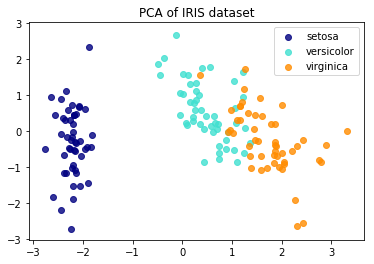

In [30]:
import matplotlib.pyplot as plt
target_names = iris.target_names
y = iris.target
print(target_names)
print (y)
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()


plt.show()

Exercise 2. Reconstruct the original iris data after dropping two least-significant eigenvalues and compute the approximation error.

In [17]:
from sklearn.datasets import load_iris 
from sklearn import preprocessing
import numpy as np
from numpy import linalg as LA

In [18]:
iris = load_iris() 
X = iris.data
Xn = preprocessing.scale(X)
#X
Xn

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [193]:
u,s,v = np.linalg.svd(Xn.T)
print ("u \n",u)
print ("s \n",s)
print ("v \n",v)

u 
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
s 
 [ 20.89551896  11.75513248   4.7013819    1.75816839]
v 
 [[  1.08374515e-01   9.98503796e-02   1.13323362e-01 ...,  -7.27833114e-02
   -6.58701606e-02  -4.59092965e-02]
 [ -4.30198387e-02   5.57547718e-02   2.70926177e-02 ...,  -2.26960075e-02
   -8.64611208e-02   1.89567788e-03]
 [  2.59377669e-02   4.83370288e-02  -1.09498919e-02 ...,  -3.81328738e-02
   -1.98113038e-01  -1.12476331e-01]
 ..., 
 [  5.42576376e-02   5.32189412e-03   2.76010922e-02 ...,   9.89545817e-01
   -1.40226565e-02  -7.86338250e-04]
 [  1.60581494e-03   8.56651825e-02   1.78415121e-01 ...,  -1.24233079e-02
    9.52228601e-01  -2.19591161e-02]
 [  2.27770498e-03   6.44405862e-03   1.49430370e-01 ...,  -6.58105858e-04
   -2.32385318e-02   9.77215825e-01]]


In [202]:
red_data = np.dot(Xn, u[:,:2])
red_data

array([[  2.26454173e+00,  -5.05703903e-01],
       [  2.08642550e+00,   6.55404729e-01],
       [  2.36795045e+00,   3.18477311e-01],
       [  2.30419716e+00,   5.75367713e-01],
       [  2.38877749e+00,  -6.74767397e-01],
       [  2.07053681e+00,  -1.51854856e+00],
       [  2.44571134e+00,  -7.45626750e-02],
       [  2.23384186e+00,  -2.47613932e-01],
       [  2.34195768e+00,   1.09514636e+00],
       [  2.18867576e+00,   4.48629048e-01],
       [  2.16348656e+00,  -1.07059558e+00],
       [  2.32737775e+00,  -1.58587455e-01],
       [  2.22408272e+00,   7.09118158e-01],
       [  2.63971626e+00,   9.38281982e-01],
       [  2.19229151e+00,  -1.88997851e+00],
       [  2.25146521e+00,  -2.72237108e+00],
       [  2.20275048e+00,  -1.51375028e+00],
       [  2.19017916e+00,  -5.14304308e-01],
       [  1.89407429e+00,  -1.43111071e+00],
       [  2.33994907e+00,  -1.15803343e+00],
       [  1.91455639e+00,  -4.30465163e-01],
       [  2.20464540e+00,  -9.52457317e-01],
       [  

In [203]:
rec_data=np.dot(red_data, u[:,:2].T)
rec_data

array([[ -9.94649483e-01,   1.06443573e+00,  -1.30560624e+00,
         -1.24776881e+00],
       [ -1.33390869e+00,  -5.71436925e-02,  -1.22656880e+00,
         -1.22297912e+00],
       [ -1.35552506e+00,   3.28842647e-01,  -1.38309889e+00,
         -1.36017238e+00],
       [ -1.41786717e+00,   7.42863254e-02,  -1.35146108e+00,
         -1.34091750e+00],
       [ -9.96601277e-01,   1.25363164e+00,  -1.37425242e+00,
         -1.30697852e+00],
       [ -5.16206153e-01,   1.95078853e+00,  -1.17147437e+00,
         -1.07178148e+00],
       [ -1.24980914e+00,   7.13102071e-01,  -1.42000663e+00,
         -1.37844378e+00],
       [ -1.07470438e+00,   8.17473916e-01,  -1.29320617e+00,
         -1.24728778e+00],
       [ -1.63111533e+00,  -3.96853762e-01,  -1.38437415e+00,
         -1.39627698e+00],
       [ -1.31033493e+00,   1.61166989e-01,  -1.28164028e+00,
         -1.26728661e+00],
       [ -7.31541585e-01,   1.56066151e+00,  -1.23495125e+00,
         -1.15365807e+00],
       [ -1.15671107e

In [204]:
print ("Error Aproximation \n",LA.norm(rec_data-Xn))

Error Aproximation 
 5.01937723539


In [ ]:
svd - get U matrix - two most dominant and drop rest - outer produc

In [58]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
436.622712563
138.183139606
22.1029917458
3.09115608534


### Scikit Learn

Tools for data mining and analysis. For now we will just focus on dimensionality reduction 

http://scikit-learn.org/stable/index.html


In [31]:
# use of PCA in Scikit for dimensional reduction of iris dataset

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r  = pca.fit_transform(X)
print(np.shape(X), np.shape(X_r))

(150, 4) (150, 2)


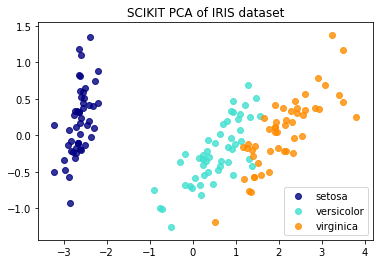

In [32]:
target_names = iris.target_names
y = iris.target
#print(target_names)
#print (y)
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('SCIKIT PCA of IRIS dataset')

plt.figure()


plt.show()

<h3> Introduction to t-SNE </h3>
One of the relatively new technique for dimensional reduction and is quite popular with machine learning community. 
The PCA transforms a number of correlated variables to a reduced number of uncorrelated variables (principal components) such that the variation for the first component is maximized. Maximizing variance also implies that you are trying to preserve distances between dissimilar points, which may not be good for visualization. What we want to preserve is the actual structure of the data and intutively structure of the data is not sensitive to large distances. 

#### Stochastic Neighbor Embedding (SNE)

SNE Key Idea: The similarity between one point $x_j$ to another point $x_i$ is given by “$p_{j|i}$, that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$”. In other words, if normal distribution is spread out (high value of std) it will pick more points as similar (neighbors).

$$p_{j|i} = \frac{\exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_j) / (2 \sigma_i^2)})}{\sum_{i \neq k} \exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_k) / (2 \sigma_i^2)})}, \quad p_{i|i} = 0,$$

 

We also have the similarity measure in the lower dimension. 

$$q_{j|i} = \frac{exp(-||\boldsymbol{y}_i - \boldsymbol{y}_j)||^2)} {\sum_{k \neq i} exp(-||\boldsymbol{y}_i - \boldsymbol{y}_k)||^2)}$$

Minimize the cost function  with gradient descent:

$$CostFunction = \sum_{i \neq j} p_{j|i} \log \frac{p_{j|i}}{q_{j|i}}$$

The cost function is such that there is high penalty if close points are mapped to far points; and less penalty if far points are mapped closer.

The algorithm uses a hyper-parameter $perplexity$, which defines the gaussian centered at $x_i$. A large value of $perplexity$ means a data point will consider more points as its close neighbors. 
We now use a python package of t-SNE for dimensional reduction of iris dataset.

In [34]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

['setosa' 'versicolor' 'virginica']
(150, 4) (150, 2)


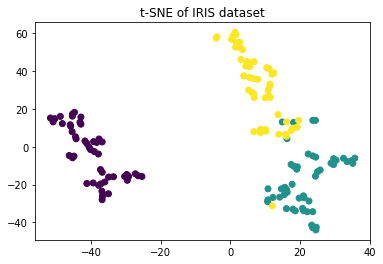

In [35]:
iris = load_iris()
target_names = iris.target_names
print(target_names)
X_tsne = TSNE(learning_rate=100, n_components=2, random_state=0, perplexity=5).fit_transform(iris.data)
print (iris.data.shape, X_tsne.shape)
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title('t-SNE of IRIS dataset')
plt.figure()
plt.show()

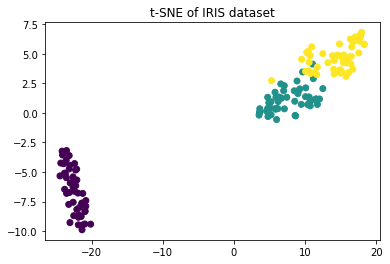

In [36]:
X_tsne = TSNE(learning_rate=100, n_components=2, random_state=0, perplexity=30).fit_transform(iris.data)
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title('t-SNE of IRIS dataset')
plt.figure()
plt.show()

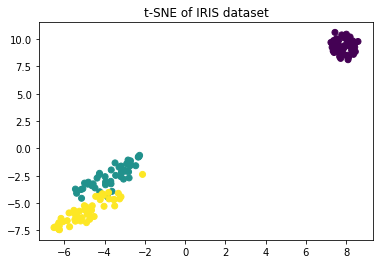

In [37]:
X_tsne = TSNE(learning_rate=100, n_components=2, random_state=0, perplexity=50).fit_transform(iris.data)
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title('t-SNE of IRIS dataset')
plt.figure()
plt.show()

<h3> Visualizing Handwritten Digits </h3>
load the digit data set

In [39]:
from sklearn.datasets import load_digits
digits = load_digits()
print (digits.data.shape)
#print(digits['DESCR'])
imagea = digits.images
targeta = digits.target
print (imagea.shape, targeta.shape)

(1797, 64)
(1797, 8, 8) (1797,)


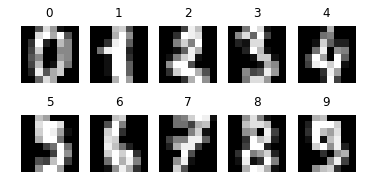

In [40]:
# The data that we are interested in is made of 8x8 images of digits. For these images, 
# we know which digit they represent: it is given in the 'target' of the dataset.
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i])
    plt.axis('off')
    plt.title(digits.target[i])

plt.show()

In [42]:
# print ten images of handwritten zero
XI = digits.images[digits.target==4]
print (XI.shape)

(181, 8, 8)


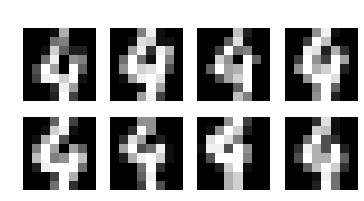

In [43]:
nrows, ncols = 2, 4
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(XI[i])
    plt.axis('off')
    
plt.show()

In [44]:
for i in range(10):
    XT = digits.data[digits.target==i]
    print (i, XT.shape)  # number of images for a digit type

0 (178, 64)
1 (182, 64)
2 (177, 64)
3 (183, 64)
4 (181, 64)
5 (182, 64)
6 (181, 64)
7 (179, 64)
8 (174, 64)
9 (180, 64)


In [45]:
# Reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
print (X.shape, y.shape)
print (y[0:20], y[178:198])

(1797, 64) (1797,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [46]:
# Random state.
RS = 20150101
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [47]:
# imports for plotting 
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

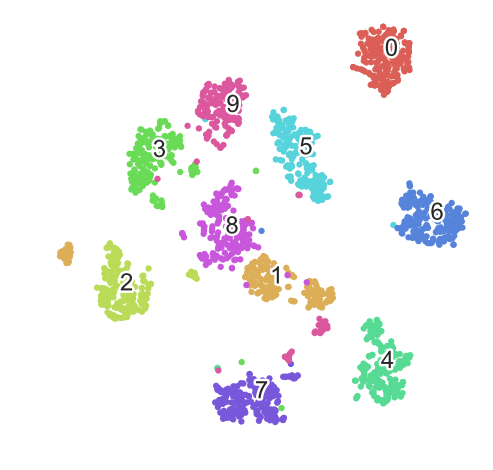

In [48]:
scatter(digits_proj, y)
plt.show()

Exercise 3: Use PCA for MNIST dataset to 2D and show the visualization. Which one is better in reducing the dimension of the data?

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis
 
digits = datasets.load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
 
def embedding_plot(X, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
 
    plt.figure()
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=y/10.)
 
    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        if np.min(np.sum((X[i] - shown_images) ** 2, axis=1)) < 1e-2: continue
        shown_images = np.r_[shown_images, [X[i]]]
        ax.add_artist(offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]))
 
    plt.xticks([]), plt.yticks([])
    plt.title(title)

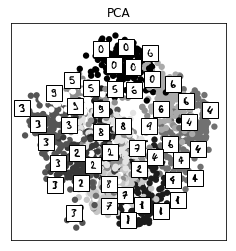

In [69]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA")
plt.show()


ValueError: c of shape (1797,) not acceptable as a color sequence for x with size 150, y with size 150

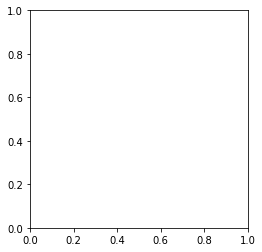

In [66]:
tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
embedding_plot(X_tsne,"t-SNE")
 
plt.show()

In [58]:
from sklearn import manifold, datasets, decomposition, discriminant_analysis

ValueError: c of shape (1797,) not acceptable as a color sequence for x with size 150, y with size 150

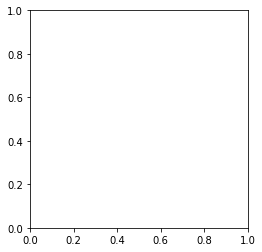

In [71]:
tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
embedding_plot(X_tsne,"t-SNE")
 
plt.show()

X_pca = decomposition.PCA(n_components=2).fit_transform(X)
embedding_plot(X_pca, "PCA")
plt.show()

In [41]:
from sklearn.datasets import fetch_mldata

In [42]:
mnist = fetch_mldata('MNIST original')

In [43]:
from sklearn.model_selection import train_test_split

In [50]:
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
# Fit on training set only.
scaler.fit(train_img)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [55]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [56]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Working with Real Estate Dataset

In [72]:
#Adapted from: https://www.kaggle.com/yohanb/t-sne-bokeh/notebook , Author: Yohan
df = pd.read_csv('resources/train_house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
y = df.pop('SalePrice') # take sale price column out as a separate column

In [74]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [75]:
# get column names that has numerical values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.values 

In [76]:
num_cols

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [77]:
# get column names that has categorical values
cat_cols = df.select_dtypes(include=['object']).columns.values 

In [78]:
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

In [79]:
# Create a data frame of numerical columns and fill NA values
# in a column by its median value
X_num = df[num_cols].fillna(df.median())
X_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [80]:
ids = X_num.pop('Id')  

In [81]:
X_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [82]:
ids.head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # get a scaler
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns.values) 


In [84]:
X_num_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [85]:
X_tsne = TSNE(learning_rate=100, n_components=2, random_state=0, 
              perplexity=5).fit_transform(X_num_scaled)


In [88]:
np.shape(X_tsne)

(1460, 2)

In [87]:
np.shape(y)

(1460,)

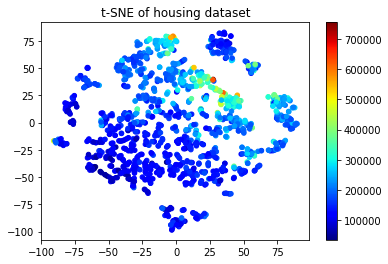

In [89]:
cmap = plt.cm.get_cmap('jet')
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap,s=20)
plt.colorbar()
plt.title('t-SNE of housing dataset')
plt.figure()
plt.show()

In [90]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [91]:
from bokeh.io import output_notebook, show
output_notebook()
import matplotlib as mpl
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
source_X = ColumnDataSource(
        data=dict(
            x = X_tsne[:len(y),0],
            y = X_tsne[:len(y),1],
            desc = y,
            colors = ["#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 
                      255*mpl.cm.jet(mpl.colors.Normalize()(y.values))],
            OverallQual = df['OverallQual'].iloc[:len(y)],
            GrLivArea = df['GrLivArea'].iloc[:len(y)],
            GarageCars = df['GarageCars'].iloc[:len(y)]
        )
    )

hover = HoverTool(tooltips=[("Price", "@desc"), 
                            ("OverallQual", "@OverallQual"), 
                            ("GrLivArea", "@GrLivArea"), 
                            ("GarageCars", "@GarageCars")])
#tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
#plot_tsne = figure(plot_width=600, plot_height=600, tools=tools_tsne, title='Prices')

p = figure(plot_width=800, plot_height=800, tools=[hover],  
           title="Housing Data")

p.circle('x', 'y', size=10, source=source_X, fill_color='colors')
show(p)





Loading BokehJS ...

In [92]:
data=dict(
            f1 = X_tsne[:len(y),0],
            f2 = X_tsne[:len(y),1],
            sale = y,
            quality = df['OverallQual'].iloc[:len(y)]
            )

In [93]:
dfn = pd.DataFrame(data)

In [94]:
dfn.head()

,f1,f2,quality,sale
0,-1.968019,50.430428,7,208500
1,40.218376,66.663170,6,181500
2,-4.498003,44.183029,7,223500
3,-49.040165,6.301732,7,140000
4,17.959597,43.738358,8,250000


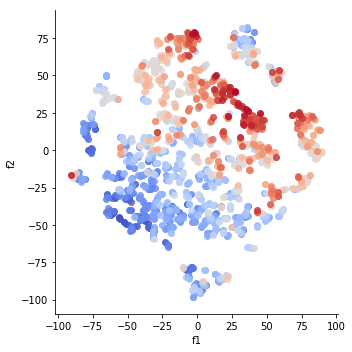

In [95]:
sns.lmplot( x="f1", y="f2", data=dfn, fit_reg=False, hue='sale', palette="coolwarm", legend=False)


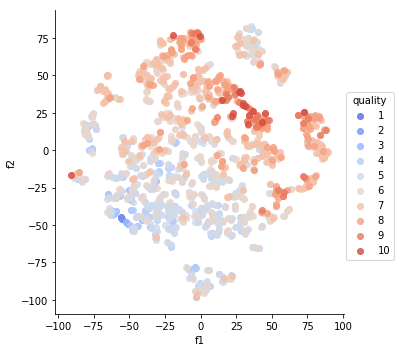

In [96]:
sns.lmplot( x="f1", y="f2", data=dfn, fit_reg=False, hue='quality', palette="coolwarm", legend=True)

Exercise 4: Repeat the above process for performing t-SNE and various plots on numerical columns of housing data where column "OverallQual" has a value of 3, 5, 7, or 10. 

In [97]:
#Adapted from: https://www.kaggle.com/yohanb/t-sne-bokeh/notebook , Author: Yohan
df = pd.read_csv('resources/train_house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
y = df.pop('OverallQual') 

In [99]:
y.head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [100]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.values 

In [101]:
num_cols

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'], dtype=object)

In [102]:
cat_cols = df.select_dtypes(include=['object']).columns.values 

In [103]:
cat_cols

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

In [104]:
X_num = df[num_cols].fillna(df.median())
X_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [105]:
ids = X_num.pop('Id')  

In [106]:
X_num.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [107]:
ids.head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # get a scaler
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns.values) 


In [109]:
X_num_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.220875,-0.207142,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.460320,-0.091886,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,-0.084636,0.073480,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0.309859,-0.447940,-0.096897,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.073375,0.641972,0.375148,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [110]:
X_tsne = TSNE(learning_rate=100, n_components=2, random_state=0, 
              perplexity=5).fit_transform(X_num_scaled)

In [111]:
np.shape(X_tsne)

(1460, 2)

In [112]:
np.shape(y)

(1460,)

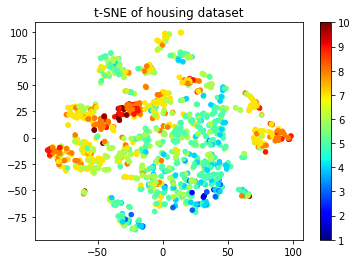

In [113]:
cmap = plt.cm.get_cmap('jet')
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap,s=20)
plt.colorbar()
plt.title('t-SNE of housing dataset')
plt.figure()
plt.show()

In [114]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
from bokeh.io import output_notebook, show
output_notebook()
import matplotlib as mpl
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
source_X = ColumnDataSource(
        data=dict(
            x = X_tsne[:len(y),0],
            y = X_tsne[:len(y),1],
            desc = y,
            colors = ["#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 
                      255*mpl.cm.jet(mpl.colors.Normalize()(y.values))],
            SalePrice = df['SalePrice'].iloc[:len(y)],
            GrLivArea = df['GrLivArea'].iloc[:len(y)],
            GarageCars = df['GarageCars'].iloc[:len(y)]
        )
    )

hover = HoverTool(tooltips=[("Price", "@desc"), 
                            ("SalePrice", "@SalePrice"), 
                            ("GrLivArea", "@GrLivArea"), 
                            ("GarageCars", "@GarageCars")])
#tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
#plot_tsne = figure(plot_width=600, plot_height=600, tools=tools_tsne, title='Prices')

p = figure(plot_width=800, plot_height=800, tools=[hover],  
           title="Housing Data")

p.circle('x', 'y', size=10, source=source_X, fill_color='colors')
show(p)

Loading BokehJS ...

In [129]:
data=dict(
            f1 = X_tsne[:len(y),0],
            f2 = X_tsne[:len(y),1],
            sale = y,
            quality = df['OverallQual'].iloc[:len(y)]
            )

KeyError: 'OverallQual'

In [120]:
dfn = pd.DataFrame(data)

In [128]:
dfn_specific=dfn.quality[3 or 5 or 7 or 10]

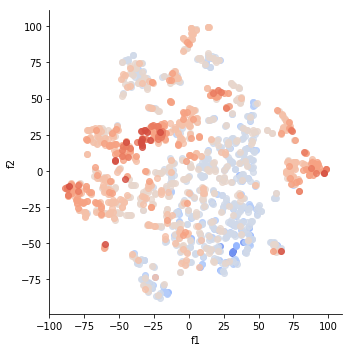

In [121]:
sns.lmplot( x="f1", y="f2", data=dfn, fit_reg=False, hue='sale', palette="coolwarm", legend=False)

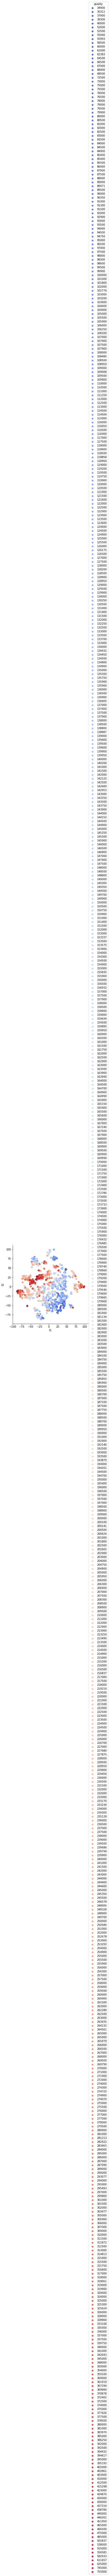

In [122]:
sns.lmplot( x="f1", y="f2", data=dfn, fit_reg=False, hue='quality', palette="coolwarm", legend=True)